In [35]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

## STEP. 1
- 讀取 ticker
- 使用 yfinance 抓取美股資料
- 數據整理
- 匯入excel

In [2]:
# 讀取 ticker
symbols = pd.read_excel('試題.xlsx', sheet_name='試題一', usecols='AU:BC', skiprows=13, nrows=564)

In [70]:
def get_stock(symbols):
    def craw_yf(origin_ticker, new_ticker):
        stk = yf.Ticker(new_ticker)
        data = stk.history()
        data['ROI'] = ((data['Close']/data['Close'].shift(1))-1)*100
        data['代碼'] = origin_ticker
        res = data.tail(1)[['代碼','Close','ROI','Volume', 'High','Low']]
        res = res.rename(columns ={
                'Close':'收盤價',
                'ROI':'日漲跌幅(%)',
                'Volume':'日成交量',
                'High':'日最高價',
                'Low':'日最低價'
                })
        return res
    # 
    # 更改指數的 ticker
    if str(symbols).__contains__('#'):
        if str(symbols) =='#SOXX':
            new_symbol = '^SOX'
        else:
            new_symbol = str(symbols).replace('#','^')
        # 
        data = craw_yf(str(symbols), new_symbol)
    else:
        data = craw_yf(str(symbols), str(symbols))
    return data

In [4]:
data = pd.DataFrame()
for i in symbols['代碼.2']:
    temp = get_stock(str(i))
    data = pd.concat([data, temp])


- 代碼: No data found, symbol may be delisted
- ABMD: No data found for this date range, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
- CTXS: No data found, symbol may be delisted
- DRE: No data found, symbol may be delisted
- FBHS: No data found, symbol may be delisted
- NLOK: No data found, symbol may be delisted
- NLSN: No data found, symbol may be delisted
- TWTR: No data found for this date range, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No data found, symbol may be delisted
- 0: No d

In [110]:
data

,代碼,收盤價,日漲跌幅(%),日成交量,日最高價,日最低價
Date,,,,,,
2023-02-17,#DJI,33826.691406,0.385317,3.029000e+08,33846.640625,33517.730469
2023-02-17,#GSPC,4079.090088,-0.276741,4.045480e+09,4081.510010,4047.949951
2023-02-17,#IXIC,11787.269531,-0.578286,4.925230e+09,11803.219727,11673.209961
2023-02-17,#SOXX,3005.870117,-1.615908,0.000000e+00,3042.429932,2980.139893
2023-02-17,nan,10.820000,-0.276504,6.640000e+04,10.870000,10.780000
...,...,...,...,...,...,...
2023-02-17,SPLK,105.000000,-1.951626,2.085000e+06,106.320000,102.849998
2023-02-17,TEAM,168.559998,-3.492503,2.271300e+06,174.389999,167.139999
2023-02-17,WDAY,185.800003,-1.038614,1.054100e+06,186.979996,183.029999


In [113]:
result = symbols.merge(data, left_on= ['代碼.2'],right_on=['代碼'], how = 'left')
result = result[['代碼.2','收盤價','日漲跌幅(%)','日成交量','日最高價','日最低價']]
result.head(30)

,代碼.2,收盤價,日漲跌幅(%),日成交量,日最高價,日最低價
0,#DJI,33826.691406,0.385317,3.029000e+08,33846.640625,33517.730469
1,#GSPC,4079.090088,-0.276741,4.045480e+09,4081.510010,4047.949951
2,#IXIC,11787.269531,-0.578286,4.925230e+09,11803.219727,11673.209961
3,#SOXX,3005.870117,-1.615908,0.000000e+00,3042.429932,2980.139893
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,代碼,NaN,NaN,NaN,NaN,NaN
9,A,148.259995,-0.013491,1.194800e+06,148.940002,146.490005


#### 資料寫入 excel

In [114]:
import openpyxl

In [115]:
# 讀取 excel
workbook = openpyxl.load_workbook('試題.xlsx')
# 選取 試題一 的工作表
sheet = workbook.worksheets[0]
fill_columns = ['AW', 'AY','AZ','BA','BB']
for col in ['AW', 'AY','AZ','BA','BB']:
    for index in range(15, 15+len(result)):
        sheet[col+str(index)] = result.iloc[index-15, fill_columns.index(col)+1]

In [136]:
# 儲存檔案
workbook.save('test.xlsx')

## STEP. 2 
### 繪圖
 - 每日漲幅前10名
 - 每日跌幅前10名

Text(0, 0.5, '報酬率')

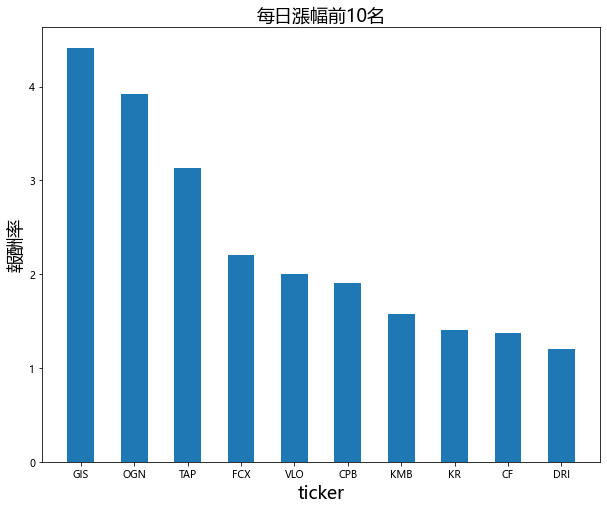

In [68]:
up_10 = data[data['日漲跌幅(%)']>0].sort_values('日漲跌幅(%)', ascending=False).head(10)
plt.figure(figsize=(10,8))
plt.bar(x = up_10['代碼'], height=up_10['日漲跌幅(%)'], label = '報酬率%', width=0.5)
plt.title('每日漲幅前10名', fontsize = 18)
plt.xlabel('ticker', fontsize = 18)
plt.ylabel('報酬率',fontsize = 18)

Text(0, 0.5, '報酬率')

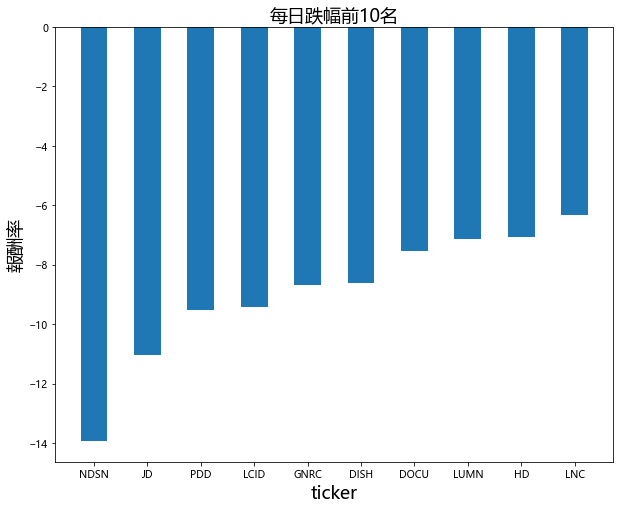

In [69]:
down_10 = data[data['日漲跌幅(%)']<0].sort_values('日漲跌幅(%)', ascending=True).head(10)
plt.figure(figsize=(10,8))
plt.bar(x = down_10['代碼'], height=down_10['日漲跌幅(%)'], label = '報酬率%', width=0.5)
plt.title('每日跌幅前10名', fontsize = 18)
plt.xlabel('ticker', fontsize = 18)
plt.ylabel('報酬率',fontsize = 18)

## STEP. 3
### 資料匯入 Access 資料庫

In [71]:
import pyodbc